# Sea level predictor project

You will anaylize a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.

* Use Pandas to import the data from `epa-sea-level.csv`.

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [88]:
df=pd.read_csv('epa-sea-level.csv')

In [89]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [152]:
#Getting to know the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [91]:
df[pd.notnull(df['NOAA Adjusted Sea Level'])]

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
113,1993,6.291339,6.027559,6.555118,6.297493
114,1994,6.500000,6.236220,6.763780,6.310934
115,1995,6.618110,6.354331,6.881890,6.452569
116,1996,6.787402,6.523622,7.051181,6.627631
117,1997,7.066929,6.803150,7.330709,6.733920
118,1998,6.665354,6.393701,6.937008,6.865806
119,1999,7.011811,6.736220,7.287402,6.848690
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698


* Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.

Text(0, 0.5, 'Sea Level (inches)')

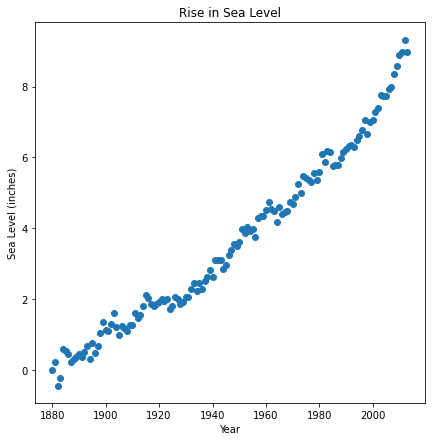

In [93]:
plt.figure(figsize=(7, 7))
plt.scatter('Year',"CSIRO Adjusted Sea Level",data=df)

plt.title('Rise in Sea Level')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')



* Use the `linregress` function from `scipy.stats` to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

In [142]:
#Creating a numpy array in order to be able to plot the regression line from the year 1880 to 2050
m=np.arange(1880,2051)


In [143]:
#Creating the regression line
x=df['Year']
y=df["CSIRO Adjusted Sea Level"]
res=linregress(x,y)


Text(0, 0.5, 'Sea Level (inches)')

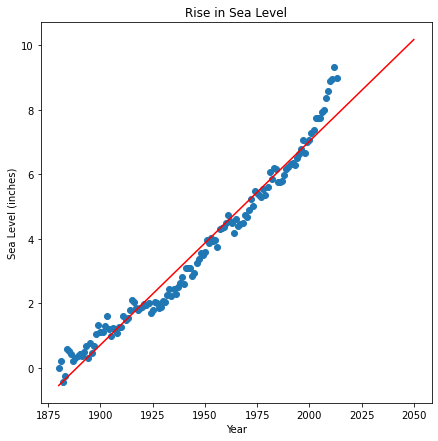

In [144]:

plt.figure(figsize=(7, 7))
plt.scatter('Year',"CSIRO Adjusted Sea Level",data=df)
plt.plot(m, res.intercept + res.slope*m, 'r', label='fitted line')
plt.title('Rise in Sea Level')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')



* Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

In [150]:
#Setting the parameters and creating the new regression line
p=df.iloc[120:]
q=p['Year']
r=p['CSIRO Adjusted Sea Level']
second_res=linregress(q,r)
#Creating a numpy array in order to be able to plot the new regression line from the year 2000 to 2050
mm=np.arange(2000,2051)


In [149]:
q

120    2000
121    2001
122    2002
123    2003
124    2004
125    2005
126    2006
127    2007
128    2008
129    2009
130    2010
131    2011
132    2012
133    2013
Name: Year, dtype: int64

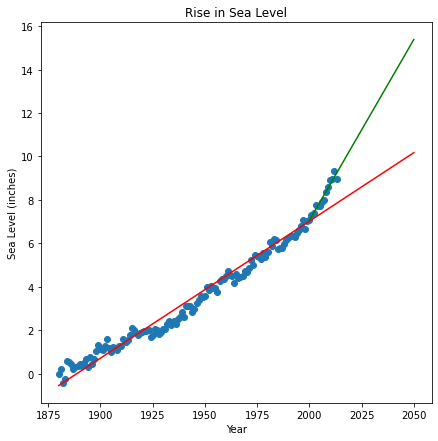

In [151]:
plt.figure(figsize=(7, 7))
plt.scatter('Year',"CSIRO Adjusted Sea Level",data=dftotal)
plt.plot(m, res.intercept + res.slope*m, 'r', label='fitted line')
plt.title('Rise in Sea Level')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.plot(mm, second_res.intercept + second_res.slope*mm, 'g', label='fitted line')